Домашнее задание состоит из нескольких задач, посвященных исследованию работы приложений, написанных на языке Python, с точки зрения оптимизации времени исполнения и используемых ресурсов памяти.
Домашнее задание можно выполнить в виде jupyter notebook и выложить на github, или выполнить в google collab. Выводы и комментарии можно писать прямо в ноутбуке, отчетов в виде word-документов не требуется.
Задание считается выполненным, если выполнены все пункты.

# 1. Ускорение преобразования Фурье

## 1.1. Необходимо написать программу, выполняющую преобразование Фурье над случайно последовательностью из 4096 чисел (воспользуйтесь модулем fft из библиотеки numpy https://numpy.org/doc/stable/reference/routines.fft.html), замерить время исполнения программы.

In [203]:
import numpy as np
import time

In [92]:
def do_fft():
    data = np.random.rand(4096)
    start_time = time.perf_counter_ns()
    fft_result = np.fft.fft(data)
    end_time = time.perf_counter_ns()
    return end_time - start_time

In [141]:
def simple_generator(val):
    while True:
       fft_time[val % num] = do_fft()
       print(f'По последним {num} запускам прогрммы:\n\tmean = {np.mean(fft_time)} нс\n\tstd = {np.std(fft_time) * (len(fft_time)/(len(fft_time) - 1)) ** (1/2)} нс')
       print(fft_time)
       val += 1
       yield val

num = 10 #кол-во отсчетов для усреднения
fft_time = [0] * num
gen_iter = simple_generator(0)

In [151]:
next(gen_iter) #необходимо запустить генератор минимум num раз

По последним 10 запускам прогрммы:
	mean = 625780.0 нс
	std = 287443.07571722404 нс
[544900, 518000, 1279100, 700200, 627900, 709000, 470100, 291900, 824200, 292500]


10

In [162]:
fft_list = [do_fft() for i in range(10)]
print(f"По 10 запускам прогрммы:\n\tmean = {np.mean(fft_list)} нс\n\tstd = {np.std(fft_list) * (len(fft_list)/(len(fft_list) - 1)) ** (1/2):.2f} нс")
print(fft_list)

По 10 запускам прогрммы:
	mean = 200270.0 нс
	std = 113097.78 нс
[517000, 189400, 206700, 162300, 150300, 144600, 160800, 175100, 147500, 149000]


## 1.2. Напишите программу, последовательно выполняющую операцию Фурье-преобразования над двумя случайными последовательностями из 4096 чисел, замерьте время выполнения.

In [163]:
def do_fft2():
    data1 = np.random.rand(4096)
    data2 = np.random.rand(4096)
    start_time = time.perf_counter_ns()
    fft_result1 = np.fft.fft(data1)
    fft_result2 = np.fft.fft(data2)
    end_time = time.perf_counter_ns()
    return end_time - start_time

In [172]:
fft_list2 = [do_fft2() for i in range(10)]
print(f"По 10 запускам прогрммы:\n\tmean = {np.mean(fft_list2)} нс\n\tstd = {np.std(fft_list2) * (len(fft_list2)/(len(fft_list2) - 1)) ** (1/2):.2f} нс")
print(fft_list2)

По 10 запускам прогрммы:
	mean = 405090.0 нс
	std = 169814.50 нс
[812400, 323400, 297400, 444900, 510900, 501700, 301000, 295600, 285200, 278400]


## 1.3. Напишите программу, которая выполняет Фурье-преобразования над двумя последовательностями из 4096 случайных чисел, но при этом каждая последовательность должна обрабатываться в отдельных потоках (воспользуйтесь библиотекой threading https://docs.python.org/3/library/threading.html), замерьте время исполнения каждого потока отдельно и всей программы.

In [174]:
import threading

In [194]:
def do_fft3(data, thread_name):
    start_time = time.perf_counter_ns()
    fft_result = np.fft.fft(data)
    end_time = time.perf_counter_ns()
    print(f"Thread {thread_name}: FFT completed in {end_time - start_time:.2f} nanoseconds.")
    return fft_result

data1 = np.random.rand(4096)
data2 = np.random.rand(4096)

# Создание потоков
thread1 = threading.Thread(target=do_fft3, args=(data1, '1'))
thread2 = threading.Thread(target=do_fft3, args=(data2, '2'))

# Измерение времени выполнения всей программы
start_program_time = time.perf_counter_ns()

# Запуск потоков
thread1.start()
thread2.start()

# Ожидание завершения потоков
thread1.join()
thread2.join()

end_program_time = time.perf_counter_ns()
print(f"Total program run time: {end_program_time - start_program_time:.2f} nanoseconds.")

Thread 1: FFT completed in 436600.00 nanoseconds.
Thread 2: FFT completed in 862500.00 nanoseconds.
Total program run time: 4418100.00 nanoseconds.


## 1.4. Сравните значения замеров времени из пунктов 1.1, 1.2 и 1.3 и объясните полученные результаты.

Время выполнения двух последовательных преобразований Фурье должно быть, примерно, в два раза больше времени выполнения одного преобразования, так как операции выполняются последовательно.

Время выполнения каждого потокпримерно равноем вренимя выполнения одного преобразования Фурье. Однако общее время выполнения обоих потоков больше, чем время выполненидвухго преобразования Фурых.

Операции выполняются одновременно в разных потоках, что позволяет сократить общее время выполнения. Однако, из-за накладных расходов на создание и управление потоками, общее время выполнения больше, чем время выполнения одной операции.

# 2. Ускорение ожидания преобразования Фурье

## 2.1. Напишите программу, которая выполняет преобразование Фурье последовательности из 4096 случайных чисел а затем синхронно “зависает” на 2 с (используйте функцию sleep). Замерьте время исполнения программы.

In [195]:
def do_fft_2_1():
    data = np.random.rand(4096)
    start_time = time.perf_counter_ns()
    fft_result = np.fft.fft(data)
    time.sleep(2)
    end_time = time.perf_counter_ns()
    return end_time - start_time

In [196]:
fft_list = [do_fft_2_1() for i in range(10)]
print(f"По 10 запускам прогрммы:\n\tmean = {np.mean(fft_list)} нс\n\tstd = {np.std(fft_list) * (len(fft_list)/(len(fft_list) - 1)) ** (1/2):.2f} нс")

По 10 запускам прогрммы:
	mean = 2000771510.0 нс
	std = 208018.14 нс


## 2.2. Напишите программу, которая в одном потоке запускает преобразование Фурье и ожидание (как в п. 2.1), а во втором потоке запускает преобразование Фурье другой случайной последовательности из 4096 чисел без ожидания. Замерьте время исполнения каждого потока отдельно и всей программы в целом.

In [197]:
def do_fft_2_2_1(data, thread_name):
    start_time = time.perf_counter_ns()
    fft_result = np.fft.fft(data)
    time.sleep(2)
    end_time = time.perf_counter_ns()
    print(f"Thread {thread_name}: FFT completed in {end_time - start_time:.2f} nanoseconds.")
    return fft_result
def do_fft_2_2_2(data, thread_name):
    start_time = time.perf_counter_ns()
    fft_result = np.fft.fft(data)
    end_time = time.perf_counter_ns()
    print(f"Thread {thread_name}: FFT completed in {end_time - start_time:.2f} nanoseconds.")
    return fft_result

In [199]:
data1 = np.random.rand(4096)
data2 = np.random.rand(4096)

thread1 = threading.Thread(target=do_fft_2_2_1, args=(data1, '1'))
thread2 = threading.Thread(target=do_fft_2_2_2, args=(data2, '2'))

# Измерение времени выполнения всей программы
start_program_time = time.perf_counter_ns()

# Запуск потоков
thread1.start()
thread2.start()

# Ожидание завершения потоков
thread1.join()
thread2.join()

end_program_time = time.perf_counter_ns()
print(f"Total program run time: {end_program_time - start_program_time:.2f} nanoseconds.")

Thread 2: FFT completed in 361000.00 nanoseconds.
Thread 1: FFT completed in 2001189900.00 nanoseconds.
Total program run time: 2005876700.00 nanoseconds.


## 2.3. Сравните значения замеров времени, полеченные в п. 2.1, 2.2 и 1.3, и объясните полученные результаты.

Время из 1.3 сопоставимо с временем выполнения потока без ожидания.

Последовательное выполнение с ожиданием занимает больше времени так как включает в себя и время выполнения преобразования Фурье, и время ожидания.

Время из пункта 2.1 и общее время пункта 2.2 похожи. Общее время выполнения программы примерно равно времени выполнения самого длительного потока, так как оба потока выполняются параллельно.

# 3. Исследуем объем используемой динамической памяти

## 3.1. Напишите программу, которая создает пустой объект класса list а затем в цикле заполняет данный список числами от 1 до 4096.

In [1]:
a = []
for i in range(4096):
    a.append(i+1)

## 3.2. После каждого добавления нового элемента в список добавьте замер используемой процессом памяти (используйте psutil https://psutil.readthedocs.io/en/latest/index.html).

In [3]:
import psutil

In [4]:
a = []
for i in range(4096):
    a.append(i+1)
    print(f'i = {i}, используется {psutil.Process().memory_info().rss} байт')

i = 0, используется 122368000 байт
i = 1, используется 122372096 байт
i = 2, используется 122372096 байт
i = 3, используется 122372096 байт
i = 4, используется 122372096 байт
i = 5, используется 122372096 байт
i = 6, используется 122372096 байт
i = 7, используется 122372096 байт
i = 8, используется 122372096 байт
i = 9, используется 122372096 байт
i = 10, используется 122372096 байт
i = 11, используется 122372096 байт
i = 12, используется 122372096 байт
i = 13, используется 122372096 байт
i = 14, используется 122372096 байт
i = 15, используется 122372096 байт
i = 16, используется 122372096 байт
i = 17, используется 122372096 байт
i = 18, используется 122372096 байт
i = 19, используется 122372096 байт
i = 20, используется 122372096 байт
i = 21, используется 122372096 байт
i = 22, используется 122372096 байт
i = 23, используется 122372096 байт
i = 24, используется 122372096 байт
i = 25, используется 122372096 байт
i = 26, используется 122372096 байт
i = 27, используется 122372096 байт
i 

## 3.3. Постройте зависимость используемой памяти от номера итерации цикла, объясните полученный результат.

In [5]:
import matplotlib.pyplot as plt

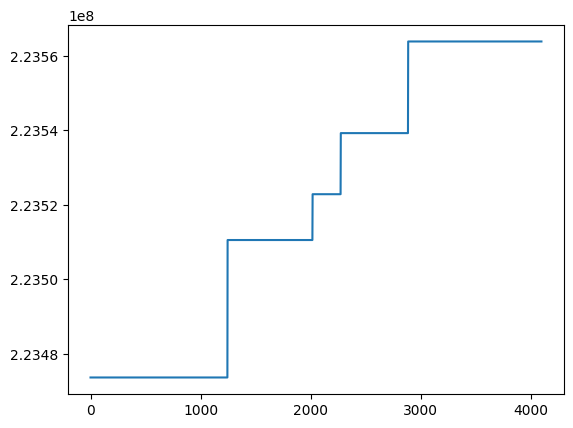

In [169]:
a = []
memory_usage = [0]*4096
for i in range(4096):
    a.append(i+1)
    cur_memory_usage = psutil.Process().memory_info().rss
    memory_usage[i] = cur_memory_usage
    #print(f'i = {i}, используется {cur_memory_usage} байт')
plt.plot(memory_usage)
plt.show()

Объяснение:

При добавлении элементов в список, используемая памяее должна постепенно увеличиваться. Однако, мы этого не видим на графике, что может быть связано с тем, что Python может выделять дополнительную память для списка заранее, чтобы оптимизировать производительность. Это означает, что после добавления определенного количества элементов, Python может выделить дополнительную память, что продит к скачкам на графикеке.

## 3.4. Повторите пункты 3.1, 3.2 и 3.3 для структуры данных dict (ключи и значения – случайные числа).

In [65]:
import random

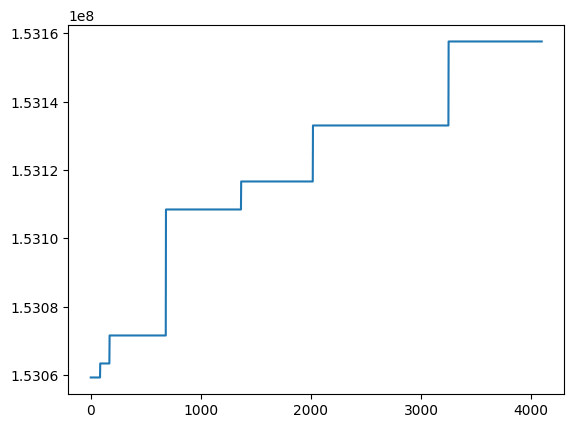

In [76]:
b = {}
memory_usage = []
for i in range(4096):
    b[random.random()] = random.random()
    cur_memory_usage = psutil.Process().memory_info().rss
    memory_usage.append(cur_memory_usage)
    #print(f'i = {i}, используется {cur_memory_usage} байт')
plt.plot(memory_usage)
plt.show()

Объяснение:

При использовании словаря, используемая память также должна увеличиваться. Однако, словарь требует больше памяти, чем список, так как он хранит не только ключи, но и значения. Кроме того, словарь использует хеш-таблицу для быстрого доступа к элементам, что также увеличивает затрачиваемую памяти.

# 4. Переполняем стек вызовов

## 4.1. Напишите программу, заполняющую список числами от 4096 используя рекурсию (https://en.wikipedia.org/wiki/Recursion_(computer_science)).

In [222]:
import sys
sys.setrecursionlimit(5000)
import inspect

In [223]:
def do_list(n):
    if n == 1:
        return [1]
    else:
        a = do_list(n-1)
        a.append(n)
        return a

In [224]:
a = do_list(4096)
#print(a)

## 4.2. Замерьте время исполнения, сравните со временем, необходимым для аналогичной операции с использованием циклов.

In [226]:
start_time1 = time.perf_counter_ns()
a1 = do_list(4096)
end_time1 = time.perf_counter_ns()

start_time2 = time.perf_counter_ns()
a2 = []
for i in range(4096):
    a2.append(i+1)
end_time2 = time.perf_counter_ns()

print(f"Через рекурсию: {end_time1 - start_time1} нс,\nчерез цикл: {end_time2 - start_time2} нс")

Через рекурсию: 1534400 нс,
через цикл: 1151900 нс


## 4.3. На каждом этапе рекурсии исследуйте размер стека вызовов (используйте модуль inspect).

In [246]:
stack_size = []
def do_list2(n):
    size = len(inspect.stack()) 
    print(size)
    if n == 1:
        return [1]
    else:
        a = do_list2(n-1)
        a.append(n)
        return a

In [247]:
b = do_list2(4096)

24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292


In [248]:
print(b)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

## 4.4. Основываясь на результатах пунктов 4.2 и 4.3 определите накладные расходы по времени на вызов функций и работу со стеком вызовов.

Вывод:
Время исполнения:

Рекурсивная функция работает медленнее, чем циклическая, из-за накладных расходов на вызов функций и управление стеком вызовов.
Размер стека вызовов:
При каждом вызове рекурсивной функции размер стека вызовов увеличивается на одну запись.
При глубокой рекурсии стек вызовов может стать очень большим, что может привести к замедлению работы программы.